In [16]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
malldf = pd.read_csv('Mall_Customers.csv')
malldf.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
malldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
malldf.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [20]:
malldf.duplicated().sum()

0

In [21]:
malldf.shape

(200, 5)

In [22]:
malldf.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [23]:
malldf.rename(columns={'CustomerID':'CustomerID', 'Gender':'Gender', 'Age':'Age','Annual Income (k$)':'Annual_Income',
'Spending Score (1-100)':'Spending_Score'}, inplace=True)

In [24]:
malldf

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


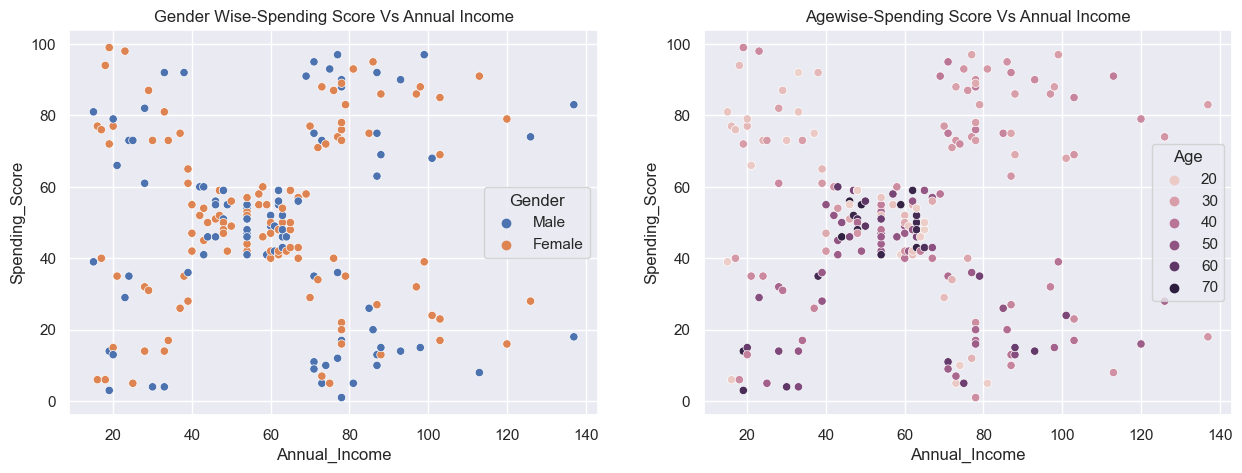

In [25]:
sns.set_theme()
fig,ax = plt.subplots(1,2, figsize=(15,5))
sns.scatterplot(data=malldf, x='Annual_Income', y='Spending_Score',hue='Gender', ax=ax[0]).set_title("Gender Wise-Spending Score Vs Annual Income")
sns.scatterplot(data=malldf, x='Annual_Income', y='Spending_Score',hue='Age', ax=ax[1]).set_title("Agewise-Spending Score Vs Annual Income")
plt.show()

In [26]:
le = LabelEncoder()
malldf['Gender']=le.fit_transform(malldf['Gender'])

In [27]:
malldf.head(5)

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [28]:
malldf.corr()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual_Income,0.977548,0.056410,-0.012398,1.000000,0.009903
Spending_Score,0.013835,-0.058109,-0.327227,0.009903,1.000000


C:\Users\cathrine\AppData\Local\Temp\ipykernel_9444\3190110426.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(malldf['Gender'],color='g',kde_kws={'color':'Red'}, ax=ax[0])
C:\Users\cathrine\AppData\Local\Temp\ipykernel_9444\3190110426.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mall

<AxesSubplot: xlabel='Spending_Score', ylabel='Density'>

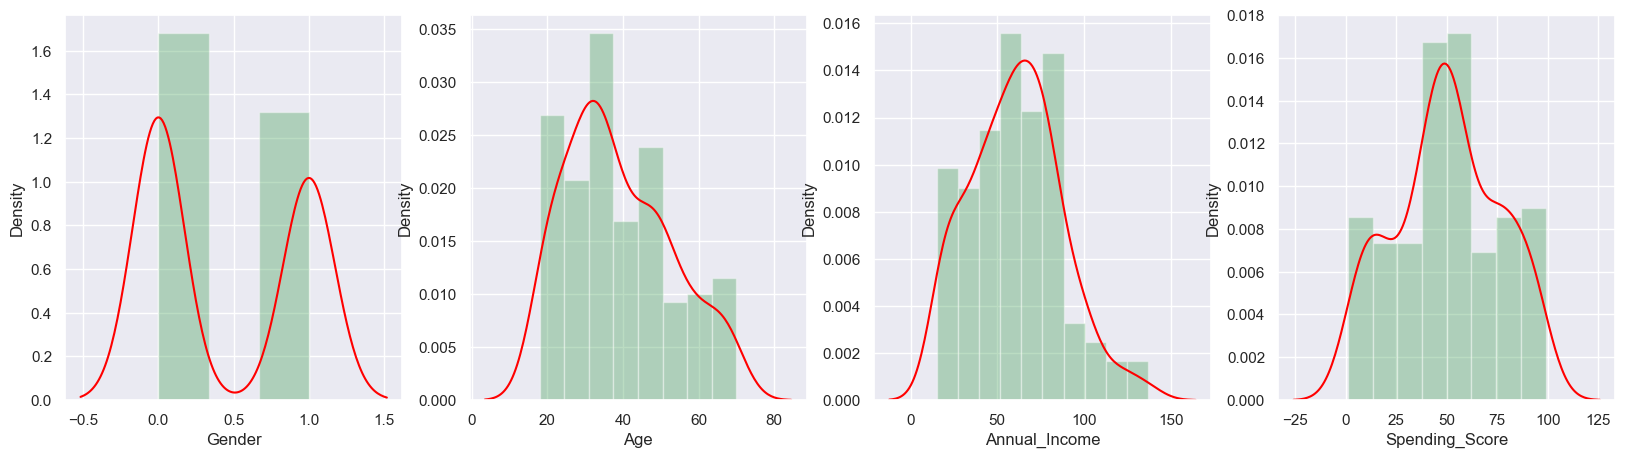

In [29]:
#Data Distributions
fig, ax = plt.subplots(1,4, figsize=(20,5))
sns.distplot(malldf['Gender'],color='g',kde_kws={'color':'Red'}, ax=ax[0])
sns.distplot(malldf['Age'], color='g',kde_kws={'color':'Red'},ax=ax[1])
sns.distplot(malldf['Annual_Income'],kde_kws={'color':'Red'}, color='g',ax=ax[2])
sns.distplot(malldf['Spending_Score'],kde_kws={'color':'Red'},color='g',ax=ax[3])

c:\mob\mob\lib\site-packages\seaborn\categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


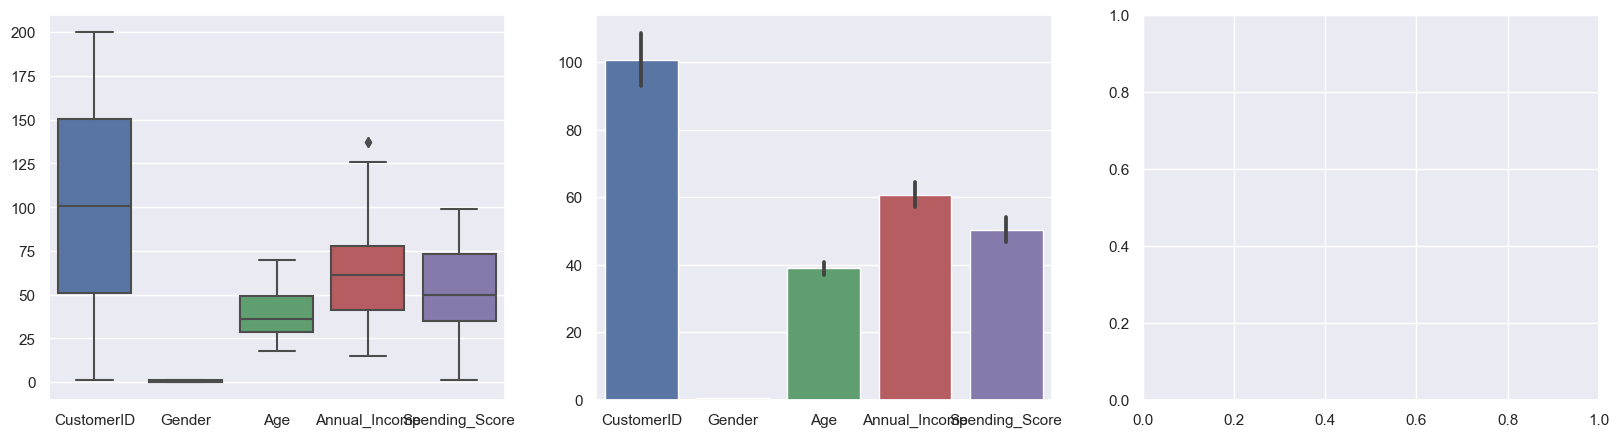

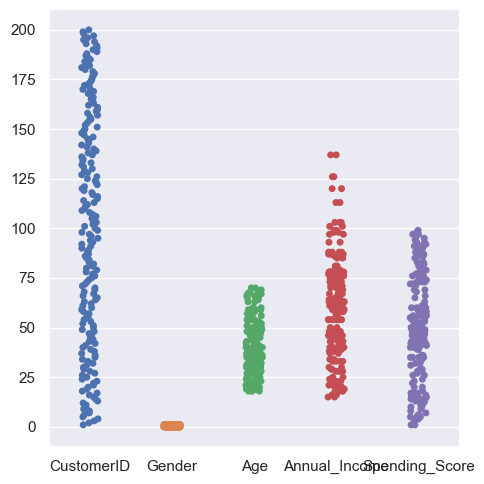

In [82]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
sns.boxplot(data=malldf,ax=ax[0])
sns.barplot(data=malldf,ax=ax[1])
sns.catplot(data=malldf,ax=ax[2])

<AxesSubplot: >

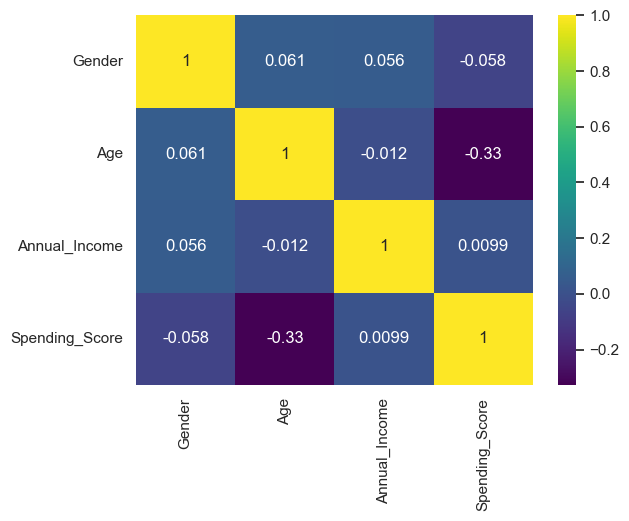

In [ ]:
sns.heatmap(malldf.corr(), annot=True, cmap='viridis')

In [ ]:
malldf.corr()

,Gender,Age,Annual_Income,Spending_Score
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual_Income,0.056410,-0.012398,1.000000,0.009903
Spending_Score,-0.058109,-0.327227,0.009903,1.000000


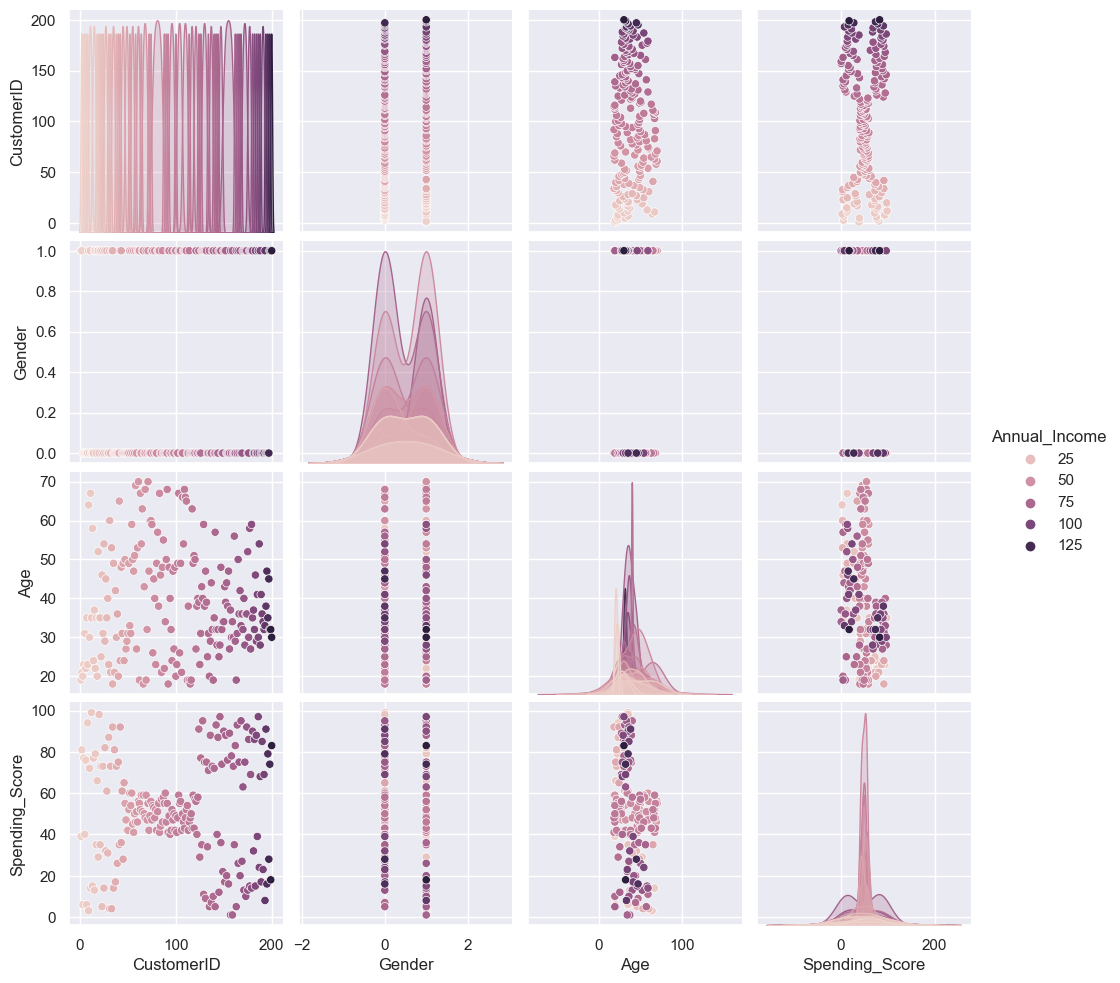

In [84]:
sns.pairplot(data=malldf, hue='Annual_Income')

C:\Users\cathrine\AppData\Local\Temp\ipykernel_11140\344448916.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=malldf, x='Annual_Income', y='Spending_Score', palette='cmap', color='g').set_title("Spending Score Vs Annual Income")


Text(0.5, 1.0, 'Spending Score Vs Annual Income')

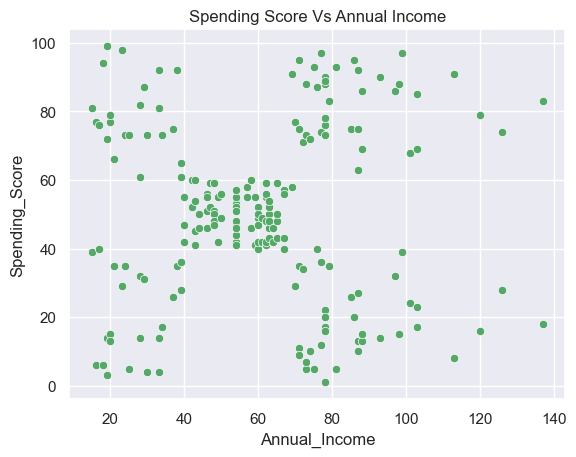

In [ ]:
sns.scatterplot(data=malldf, x='Annual_Income', y='Spending_Score', palette='cmap', color='g').set_title("Spending Score Vs Annual Income")

In [86]:
# Feature Selection
X = malldf.iloc[:,[2,-1]]
X.shape

(200, 2)

In [ ]:
# To Find the optimum value for cluster
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

c:\mob\mob\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\mob\mob\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\mob\mob\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\mob\mob\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\mob\mob\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will c

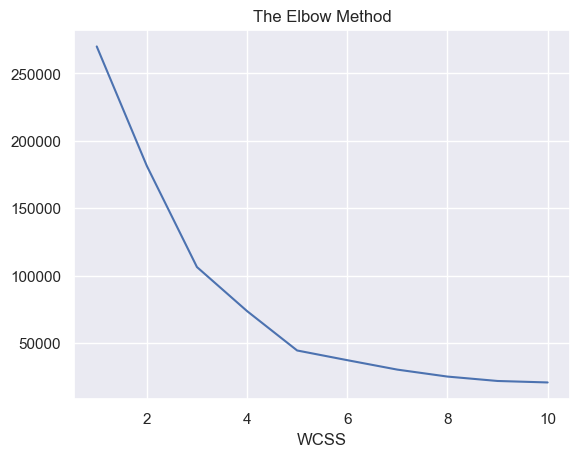

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No of CLusters')
plt.xlabel('WCSS')
plt.show()

In [ ]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37265.86520484346,
 30259.65720728547,
 25095.703209997548,
 21830.041978049438,
 20736.679938924128]

In [ ]:
wcss_data = pd.DataFrame(wcss)

In [ ]:
wcss_data

,0
0,269981.280000
1,181363.595960
2,106348.373062
3,73679.789039
4,44448.455448
5,37265.865205
6,30259.657207
7,25095.703210
8,21830.041978
9,20736.679939


# MODEL BUILDING

In [90]:
model_kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans = model_kmeans.fit_predict(X)

c:\mob\mob\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
